In [274]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, sample, randint
#%matplotlib inline

In [280]:
def GraficaPoblacion(P,gen = False):
    #Gráficas de curvas de nivel
    plt.clf()
    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    X = np.linspace(-5,5,100)
    Y = np.linspace(-5,5,100)
    X, Y = np.meshgrid(X, Y)
    Z = 20+X**2+Y**2-10*np.cos(2*np.pi*X)-10*np.cos(2*np.pi*Y)
    CS = plt.contour(X, Y, Z,alpha=0.75)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('Poblacion')

    #grafica la población
    if gen:
        for I in P:
            [x1,x2] = I[0],I[1]
            plt.scatter(x1,x2,s=30,c='r')    
    else:
        for I in P:
            [x1,x2] = Ind2Number(I,v_min,v_max,n_var,n_bits)
            plt.scatter(x1,x2,s=30,c='r')    
    plt.show()
    
def GraficaPoblaciones(Ps, gen = False):
    #Gráficas de curvas de nivel
    plt.clf()
    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    X = np.linspace(-5,5,100)
    Y = np.linspace(-5,5,100)
    X, Y = np.meshgrid(X, Y)
    Z = 20+X**2+Y**2-10*np.cos(2*np.pi*X)-10*np.cos(2*np.pi*Y)
    CS = plt.contour(X, Y, Z,alpha=0.75)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('Poblacion')

    #grafica la población
    cols = ['r','b','g','k']
    for i,P in enumerate(Ps):
        if gen:
            for I in P:
                [x1,x2] = I[0],I[1]
                plt.scatter(x1,x2,s=30,c=cols[i%4])    
        else:
            for I in P:
                [x1,x2] = Ind2Number(I,v_min,v_max,n_var,n_bits)
                plt.scatter(x1,x2,s=30,c=cols[i%4])    
    plt.show()

In [4]:
def IniciaPob(N,n_var,n_bits):
    Pob = []
    for i in range(N):
        I = ''
        for v in range(n_var):
            for b in range(n_bits):
                I = I+sample(['0','1'],1)[0]
        Pob.append(I)
    return Pob

In [10]:
def Ind2Number(I, v_min, v_max, n_vars, n_bits):        
    numb = []
    for i in range(n_vars):
        cod_v = I[i*n_bits:(i+1)*n_bits]
        d_i = int(cod_v,2)
        val = v_min[i]+d_i*(v_max[i]-v_min[i])/float(2**n_bits-1)
        numb.append(val)
    return numb        

In [41]:
def Convert_Poblation(P0,v_min,v_max,n_vars,n_bits):
    pop = []
    for item in P0:
        pop.append(Ind2Number(item,v_min,v_max,n_vars,n_bits))
    return pop
    

In [47]:
N = 10
n_bits = 4
n_var = 2
v_min = [-5,-5]
v_max = [5,5] 

P0 = IniciaPob(N,n_var,n_bits)
P0_Gen = Convert_Poblation(P0,v_min,v_max,n_vars,n_bits)
P0_Gen

[[-1.6666666666666665, 3.666666666666666],
 [-4.333333333333333, -5.0],
 [-4.333333333333333, 1.666666666666667],
 [1.666666666666667, -3.666666666666667],
 [-4.333333333333333, -2.3333333333333335],
 [5.0, -4.333333333333333],
 [0.33333333333333304, -1.0],
 [-3.0, -2.3333333333333335],
 [-3.666666666666667, 5.0],
 [0.33333333333333304, -1.6666666666666665]]

In [266]:
def Aptitude(I,gen = False):
    if gen:
        [x1,x2] = I[0],I[1]
        r = 20+x1**2+x2**2-10*np.cos(2*np.pi*x1)-10*np.cos(2*np.pi*x2)
    else:
        [x1,x2] = Ind2Number(I,v_min,v_max,n_var,n_bits)
        r = 20+x1**2+x2**2-10*np.cos(2*np.pi*x1)-10*np.cos(2*np.pi*x2)
    return 1.0/(1.0+0.1*r)

In [219]:
def Evo(parents,child_size,ro):
    childs = []
    for i in range(child_size):
        p = np.array(sample(parents,ro))
        childs.append([np.sum(p[:,0])/len(p),np.sum(p[:,1])/len(p)])
    return childs

Gen_Childs = Evo(P0_Gen,len(P0_Gen)+20,5)
Gen_Childs

[[-1.1333333333333333, -1.2666666666666666],
 [-0.7333333333333333, -0.2000000000000001],
 [-2.2, -2.4666666666666663],
 [-1.9333333333333331, -2.2],
 [-2.066666666666667, -0.4666666666666667],
 [-0.7333333333333333, -0.20000000000000018],
 [-2.7333333333333334, -1.6666666666666667],
 [-1.4, -0.3333333333333335],
 [-0.8666666666666666, -2.066666666666667],
 [-2.733333333333333, 0.8666666666666665],
 [-3.0, 0.2],
 [-0.5999999999999999, -1.5333333333333332],
 [-0.8666666666666666, 0.0666666666666667],
 [-3.4, 0.6],
 [-1.2666666666666666, -2.1999999999999997],
 [-1.2666666666666668, 0.19999999999999982],
 [-0.7333333333333333, -1.0],
 [-0.4666666666666668, -0.8666666666666668],
 [-0.7333333333333332, -1.5333333333333334],
 [-2.5999999999999996, -1.4000000000000004],
 [-1.6666666666666665, -1.8000000000000003],
 [0.6, -3.1333333333333333],
 [-2.733333333333333, -0.3333333333333333],
 [-1.0, -0.6],
 [-0.7333333333333333, -0.20000000000000018],
 [-0.8666666666666668, -0.4666666666666668],
 [

In [291]:
def Mutacion(P,sd):
    mutatedChilds = []
    for i in P:
        mutatedChilds.append([i[0]+np.random.normal(loc = 0,scale=sd),i[1]+np.random.normal(loc = 0,scale=sd)])
    return mutatedChilds

Gen_Childs = Mutacion(Gen_Childs,.5)
Gen_Childs

[[-4.620654593928551, -2.184873002195904],
 [-6.6224746659238525, 5.636468279612238],
 [-11.83030038960974, 4.409698273843592],
 [-15.248746575342887, -7.869159541212733],
 [10.04169827014231, -0.22222456102993854],
 [-1.4791120976050856, 3.4879209781178298],
 [-19.63656426689543, -3.699487213538574],
 [-7.5078817544159016, 1.0677211537564602],
 [3.0879533333322446, 1.6465827160379052],
 [3.3236932883637467, 5.375131113637019],
 [-9.49210198373104, -7.544946815475816],
 [-3.4324998704783773, 3.8712236670313613],
 [-5.34986341087006, -4.498321223001638],
 [-3.8502048490496192, 9.1471279317162],
 [1.4254713911476586, -10.258804375899842],
 [-6.766250280501751, 2.115892536680239],
 [0.07840030903332042, -1.0333727971864723],
 [0.7352191596104991, 5.732599321425185],
 [-5.0536889056695, -3.134507512918658],
 [2.7688211214422096, -12.189637678778315],
 [-0.022348103806838077, 1.2073133607612132],
 [-14.19452730588189, -11.094295140152589],
 [0.48452265391339544, -8.165195165943485],
 [6.767

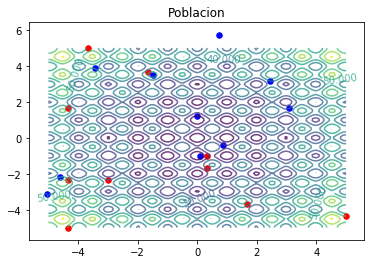

In [292]:
def Seleccion(P,N):
    selected = []
    aptitudes = []
    newGen = []
    
    for i in P:
        aptitudes.append(np.array([i[0],i[1],Aptitude(i,True)]))
    aptitudes = sorted(aptitudes,key= lambda x: x[2],reverse=True)
    
    for new in aptitudes[:10]:
        newGen.append([new[0],new[1]])
    
    return newGen

newGen = Seleccion(Gen_Childs,N)

GraficaPoblaciones([P0_Gen,newGen],True)